In [81]:
# import lib
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Result Sample </br> 
This is what we should provide as a result.

In [3]:
# import databases
sample = pd.read_csv("sample_submission.csv\sample_submission.csv")
sample.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Stacker PC\AppData\Local\Temp\ipykernel_29084\2089139437.py:1: SyntaxWarning: invalid escape sequence '\s'
  sample = pd.read_csv("sample_submission.csv\sample_submission.csv")


,id,type
0,3,Ghost
1,6,Ghost
2,9,Ghost
3,10,Ghost
4,13,Ghost


Test Data </br>
Will be used to test the model

In [10]:
test = pd.read_csv("test.csv/test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             529 non-null    int64  
 1   bone_length    529 non-null    float64
 2   rotting_flesh  529 non-null    float64
 3   hair_length    529 non-null    float64
 4   has_soul       529 non-null    float64
 5   color          529 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 24.9+ KB


Train Data

In [11]:
train = pd.read_csv("train.csv/train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             371 non-null    int64  
 1   bone_length    371 non-null    float64
 2   rotting_flesh  371 non-null    float64
 3   hair_length    371 non-null    float64
 4   has_soul       371 non-null    float64
 5   color          371 non-null    object 
 6   type           371 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


## EDA

In [56]:

print("\nNumerical Features Statistics:")
print(train.describe())


Numerical Features Statistics:
               id  bone_length  rotting_flesh  hair_length    has_soul
count  371.000000   371.000000     371.000000   371.000000  371.000000
mean   443.676550     0.434160       0.506848     0.529114    0.471392
std    263.222489     0.132833       0.146358     0.169902    0.176129
min      0.000000     0.061032       0.095687     0.134600    0.009402
25%    205.500000     0.340006       0.414812     0.407428    0.348002
50%    458.000000     0.434891       0.501552     0.538642    0.466372
75%    678.500000     0.517223       0.603977     0.647244    0.600610
max    897.000000     0.817001       0.932466     1.000000    0.935721


C:\Users\Stacker PC\AppData\Local\Temp\ipykernel_29084\3996062370.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x = 'type', palette = 'pastel')


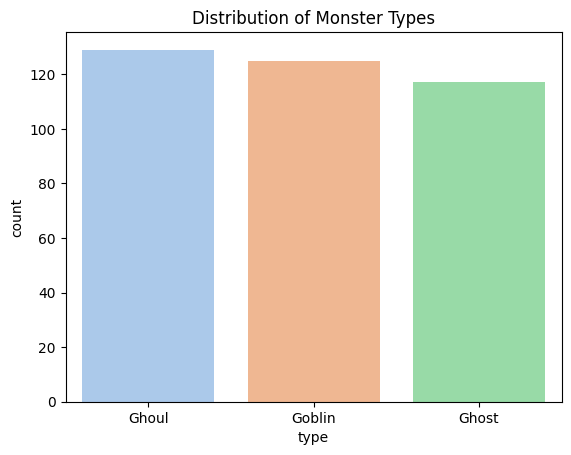

In [61]:
sns.countplot(train, x = 'type', palette = 'pastel')
plt.title('Distribution of Monster Types')
plt.show()

C:\Users\Stacker PC\AppData\Local\Temp\ipykernel_29084\1192238160.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x = 'color', palette = 'pastel')


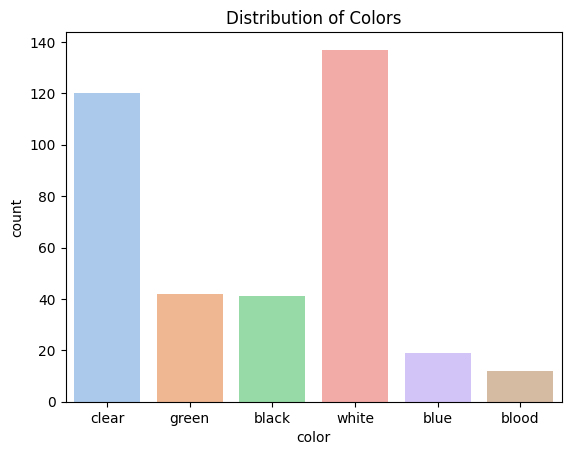

In [60]:
sns.countplot(train, x = 'color', palette = 'pastel')
plt.title('Distribution of Colors')
plt.show()

The color feature shows significant class imbalance (white: 137, clear: 120, green: 42, black: 41, blue: 19, blood: 12). Given the presence of other informative features like bone_length, rotting_flesh, hair_length, and has_soul, we can exclude the color feature to avoid potential bias in our model.

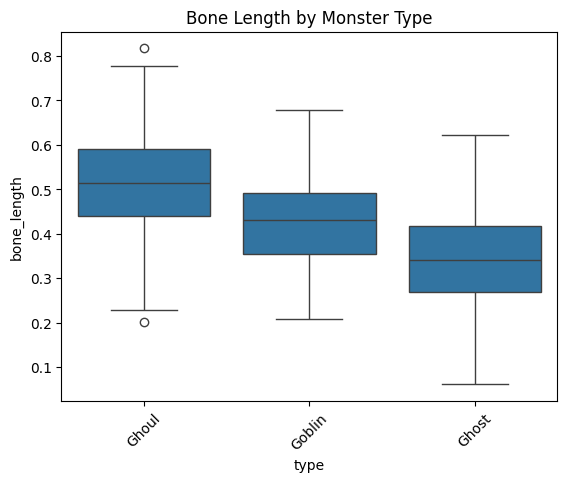

In [67]:
sns.boxplot(data=train, x='type', y='bone_length')
plt.title('Bone Length by Monster Type')
plt.xticks(rotation=45)
plt.show()

([0, 1, 2], [Text(0, 0, 'Ghoul'), Text(1, 0, 'Goblin'), Text(2, 0, 'Ghost')])

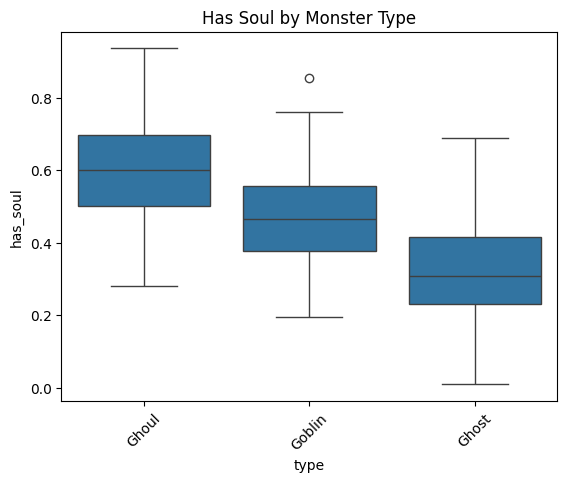

In [66]:
sns.boxplot(data=train, x='type', y='has_soul')
plt.title('Has Soul by Monster Type')
plt.xticks(rotation=45)

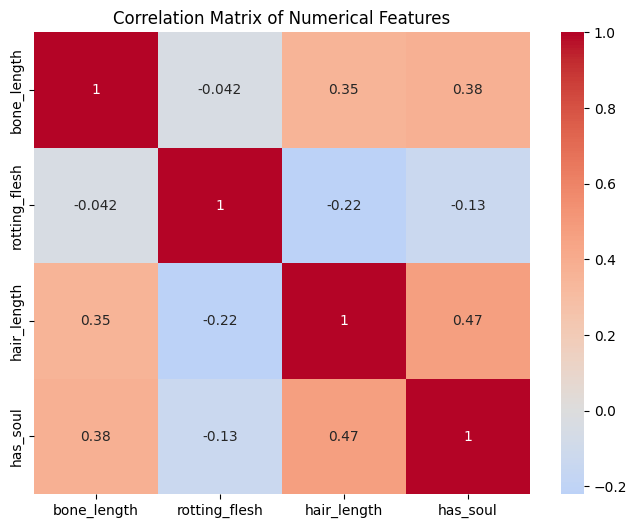

In [70]:
# Correlation matrix for numerical features
numerical_features = ['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']
correlation_matrix = train[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Model Construction

In [74]:
# Features
X = train.drop(columns=["type", "color", "id"], inplace=False)
X.head()


,bone_length,rotting_flesh,hair_length,has_soul
0,0.354512,0.350839,0.465761,0.781142
1,0.575560,0.425868,0.531401,0.439899
2,0.467875,0.354330,0.811616,0.791225
3,0.776652,0.508723,0.636766,0.884464
4,0.566117,0.875862,0.418594,0.636438


In [75]:
# Target variable
y = train["type"]
y.head()

0     Ghoul
1    Goblin
2     Ghoul
3     Ghoul
4     Ghost
Name: type, dtype: object

Create the model

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
model = DecisionTreeClassifier(random_state=42)


In [84]:
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [86]:
# Make predictions
y_pred = model.predict(X_test)

# Print model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6666666666666666

Classification Report:
              precision    recall  f1-score   support

       Ghost       0.81      0.71      0.76        24
       Ghoul       0.70      0.66      0.68        29
      Goblin       0.52      0.64      0.57        22

    accuracy                           0.67        75
   macro avg       0.68      0.67      0.67        75
weighted avg       0.68      0.67      0.67        75

